In [1]:
# Bibliotecas necessarias
import cv2
import sys
import numpy as np
from scipy import ndimage as ndimage
from matplotlib import pyplot as plt
from matplotlib import gridspec as gridspec

In [2]:
def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)
    
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    
    return (G, theta)

In [14]:
def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180
   
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                    print("angle 0")

                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                    print("angle 45")
                    
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                    print("angle 90")
                    
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]
                    print("angle 135")
                    
                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z

In [15]:
img = np.array([[0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0,],
                [255, 0, 255, 255, 255, 255, 255, 255, 255, 255, 0, 255,],
                [255, 255, 0, 255, 255, 255, 255, 255, 255, 0, 255, 255,],
                [255, 255, 255, 0, 255, 255, 255, 255, 0, 255, 255, 255,],
                [255, 255, 255, 255, 0, 255, 255, 0, 255, 255, 255, 255,],
                [255, 255, 255, 255, 255, 0, 0, 255, 255, 255, 255, 255,],
                [255, 255, 255, 255, 255, 0, 0, 255, 255, 255, 255, 255,],
                [255, 255, 255, 255, 0, 255, 255, 0, 255, 255, 255, 255,],
                [255, 255, 255, 0, 255, 255, 255, 255, 0, 255, 255, 255,],
                [255, 255, 0, 255, 255, 255, 255, 255, 255, 0, 255, 255,],
                [255, 0, 255, 255, 255, 255, 255, 255, 255, 255, 0, 255,],
                [0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0,]])

In [16]:
g, theta = sobel_filters(img)
sob = np.hypot(g, theta)
sob = np.array(sob).tolist()

In [17]:
nms = non_max_suppression(g, theta)

angle 0
angle 45
angle 45
angle 0
angle 0
angle 0
angle 0
angle 135
angle 135
angle 0
angle 45
angle 0
angle 45
angle 45
angle 0
angle 0
angle 135
angle 135
angle 0
angle 135
angle 45
angle 45
angle 0
angle 45
angle 45
angle 135
angle 135
angle 0
angle 135
angle 135
angle 0
angle 45
angle 45
angle 0
angle 90
angle 90
angle 0
angle 135
angle 135
angle 0
angle 0
angle 0
angle 45
angle 0
angle 135
angle 45
angle 0
angle 135
angle 0
angle 0
angle 0
angle 0
angle 135
angle 0
angle 45
angle 135
angle 0
angle 45
angle 0
angle 0
angle 0
angle 135
angle 135
angle 0
angle 90
angle 90
angle 0
angle 45
angle 45
angle 0
angle 135
angle 135
angle 0
angle 135
angle 135
angle 45
angle 45
angle 0
angle 45
angle 45
angle 135
angle 0
angle 135
angle 135
angle 0
angle 0
angle 45
angle 45
angle 0
angle 45
angle 0
angle 135
angle 135
angle 0
angle 0
angle 0
angle 0
angle 45
angle 45
angle 0


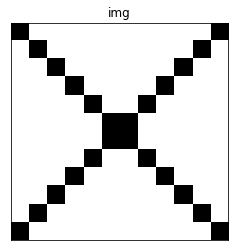

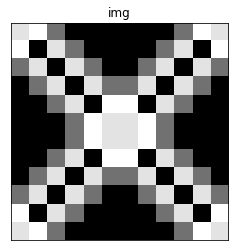

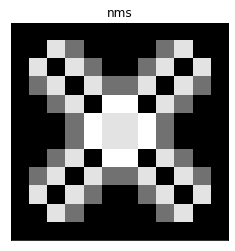

In [12]:
plt.imshow(img, cmap = 'gray')
plt.title('img'), plt.xticks([]), plt.yticks([])
plt.show() 

plt.imshow(sob, cmap = 'gray')
plt.title('img'), plt.xticks([]), plt.yticks([])
plt.show() 

plt.imshow(nms, cmap = 'gray')
plt.title('nms'), plt.xticks([]), plt.yticks([])
plt.show() 

In [19]:
angle = theta * 180. / np.pi
angle[angle < 0] += 180

In [20]:
angle

array([[135.        ,  18.43494882,  45.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 135.        , 161.56505118,  45.        ],
       [ 71.56505118,   0.        ,  45.        ,  45.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
        135.        , 135.        ,   0.        , 108.43494882],
       [ 45.        ,  45.        ,   0.        ,  45.        ,
         45.        ,   0.        ,   0.        , 135.        ,
        135.        ,   0.        , 135.        , 135.        ],
       [  0.        ,  45.        ,  45.        ,   0.        ,
         45.        ,  45.        , 135.        , 135.        ,
          0.        , 135.        , 135.        ,   0.        ],
       [  0.        ,   0.        ,  45.        ,  45.        ,
          0.        ,  71.56505118, 108.43494882,   0.        ,
        135.        , 135.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,